![Screenshot 2024-06-20 at 08.41.24.png](<attachment:Screenshot 2024-06-20 at 08.41.24.png>)
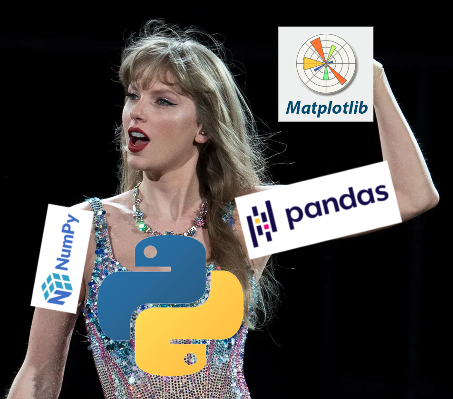

# Intro to Data Analysis in Python using Pandas & Friends

#### Learning Objectives
- Use the Pandas package to read and explore the dataset
- Perform simple Pandas operations on the dataset
- Visualise the data using Matplotlib and Seaborn packages

#### Dataset
This dataset consist of data from Spotify's API on all albums listed on Spotify for Taylor Swift.

<b>name</b>  - the name of the song <br>
<b>album</b>  - the name of the album <br>
<b>release_date</b>  - the day month and year the album was released<br>
<b>track number</b>  - the order the song appears on the album<br>
<b>id</b>  - the Spotify id for the song<br>
<b>uri</b>  - the Spotify uri for the song<br>
<b>acousticness</b>  - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.<br>
<b>danceability</b>  - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.<br>
<b>energy</b>  - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. <br>
<b>instrumentalness</b>  - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. <br>
<b>liveness</b>  - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.<br>
<b>loudness</b>  - The overall loudness of a track in decibels (dB). <br>
<b>speechiness</b>  - Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.<br>
<b>tempo</b>  - The overall estimated tempo of a track in beats per minute (BPM).<br>
<b>valence</b>  - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).<br>
<b>popularity</b>  - The popularity of the song from 0 to 100<br>
<b>duration_ms</b> - The duration of the track in milliseconds.<br>

#### Documentation
https://pandas.pydata.org/docs/ <br>
https://numpy.org/doc/stable/index.html <br>
https://matplotlib.org/stable/index.html <br>
https://seaborn.pydata.org/index.html <br>
https://www.kaggle.com/datasets/jarredpriester/taylor-swift-spotify-dataset/data <br>

### Exercise 1: Load and Inspect the Data

In [23]:
# Import the packages for Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [24]:
# Read in the CSV, assign it to the df variable
df = pd.read_csv('taylor_swift_spotify_edited.csv')

In [25]:
# Take a look at the top (head) of the dataframe
df.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Tied Together with a Smile,Taylor Swift,24/10/2006,7,2zzxwmoOBnXDT0KnJsoIWk,spotify:track:2zzxwmoOBnXDT0KnJsoIWk,0.52500,0.479,0.578,0.0,0.0841,-4.963,0.0294,146.165,0.192,53,248106
1,Invisible,Taylor Swift,24/10/2006,13,1k3PzDNjg38cWqOvL4M9vq,spotify:track:1k3PzDNjg38cWqOvL4M9vq,0.63700,0.612,0.394,0.0,0.1470,-5.723,0.0243,96.001,0.233,53,203226
2,Cold As You,Taylor Swift,24/10/2006,5,569sXXQ7t0jSdqHooi2yqs,spotify:track:569sXXQ7t0jSdqHooi2yqs,0.21700,0.418,0.482,0.0,0.1230,-5.769,0.0266,175.558,0.261,55,239013
3,A Perfectly Good Heart,Taylor Swift,24/10/2006,14,0YgHuReCSPwTXYny7isLja,spotify:track:0YgHuReCSPwTXYny7isLja,0.00349,0.483,0.751,0.0,0.1280,-5.726,0.0365,156.092,0.268,52,220146
4,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,24/10/2006,3,2TF4UtYreqNbQ6Z9AccldU,spotify:track:2TF4UtYreqNbQ6Z9AccldU,0.28800,0.621,0.417,0.0,0.1190,-6.941,0.0231,99.953,0.289,63,203040


In [26]:
# Check some descriptive statistics of the dataset (numerical columuns)
df.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,10.599034,0.308159,0.583449,0.569372,0.003562,0.138496,-7.549565,0.057341,123.130116,0.390664,70.531401,239066.599034
std,6.663813,0.320270,0.114319,0.178860,0.028600,0.074808,2.773177,0.058212,31.503229,0.186595,8.217181,48769.328324
min,1.000000,0.000191,0.175000,0.131000,0.000000,0.039100,-15.512000,0.023100,68.534000,0.038400,52.000000,146436.000000
25%,5.000000,0.028400,0.515500,0.439000,0.000000,0.092350,-9.242500,0.030550,97.045500,0.248000,65.000000,209328.500000
50%,10.000000,0.162000,0.594000,0.574000,0.000000,0.114000,-7.075000,0.038400,119.880000,0.380000,70.000000,233626.000000
75%,15.000000,0.599500,0.654500,0.710500,0.000020,0.156000,-5.621500,0.056650,145.914500,0.514500,77.000000,261229.000000
max,30.000000,0.971000,0.897000,0.934000,0.333000,0.475000,-1.927000,0.519000,208.918000,0.920000,95.000000,613026.000000


In [27]:
# Show some basic info about the dataset - 207 rows, 17 columns, mostly floats, doesn't seem to be any obvious null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              207 non-null    object 
 1   album             207 non-null    object 
 2   release_date      207 non-null    object 
 3   track_number      207 non-null    int64  
 4   id                207 non-null    object 
 5   uri               207 non-null    object 
 6   acousticness      207 non-null    float64
 7   danceability      207 non-null    float64
 8   energy            207 non-null    float64
 9   instrumentalness  207 non-null    float64
 10  liveness          207 non-null    float64
 11  loudness          207 non-null    float64
 12  speechiness       207 non-null    float64
 13  tempo             207 non-null    float64
 14  valence           207 non-null    float64
 15  popularity        207 non-null    int64  
 16  duration_ms       207 non-null    int64  
dt

In [28]:
# Check the number of songs per album
album_counts = df['album'].value_counts()
print("\nNumber of songs per album:")
print(album_counts)


Number of songs per album:
album
Red (Taylor's Version)           30
Fearless (Taylor's Version)      26
Speak Now (Taylor's Version)     22
1989 (Taylor's Version)          21
Lover                            18
THE TORTURED POETS DEPARTMENT    16
folklore                         16
Taylor Swift                     15
reputation                       15
evermore                         15
Midnights                        13
Name: count, dtype: int64


#### Exercise 2: Data Cleaning

In [29]:
# Transform the upper case and lower case as Title Case
albums_to_title_case = ['THE TORTURED POETS DEPARTMENT', 'evermore', 'reputation', 'folklore']
df['album'] = df['album'].apply(lambda x: x.title() if x in albums_to_title_case else x)

In [30]:
df['album'].unique()

array(['Taylor Swift', "Fearless (Taylor's Version)",
       "Speak Now (Taylor's Version)", "Red (Taylor's Version)",
       "1989 (Taylor's Version)", 'Reputation', 'Lover', 'Folklore',
       'Evermore', 'Midnights', 'The Tortured Poets Department'],
      dtype=object)

In [31]:
# Convert release date to a nice date format, and create a more intuitive duration column
df['release_date'] = pd.to_datetime(df['release_date'], format='mixed')
df['duration_minutes'] = df['duration_ms'] / 60000

In [32]:
# Sort the dataframe by release date and track number
df = df.sort_values(by=['release_date','track_number'], ascending=True)
df.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_minutes
6,Tim McGraw,Taylor Swift,2006-10-24,1,2Fn01AIMyHbha2ceNQeOqw,spotify:track:2Fn01AIMyHbha2ceNQeOqw,0.575,0.580,0.491,0.0,0.1210,-6.462,0.0251,76.009,0.425,55,232106,3.868433
14,Picture To Burn,Taylor Swift,2006-10-24,2,4BYejINgfZF0qKDMEH2cim,spotify:track:4BYejINgfZF0qKDMEH2cim,0.173,0.658,0.877,0.0,0.0962,-2.098,0.0323,105.586,0.821,60,173066,2.884433
4,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,2006-10-24,3,2TF4UtYreqNbQ6Z9AccldU,spotify:track:2TF4UtYreqNbQ6Z9AccldU,0.288,0.621,0.417,0.0,0.1190,-6.941,0.0231,99.953,0.289,63,203040,3.384000
7,A Place in this World,Taylor Swift,2006-10-24,4,1oR4MUBpyNrAViC8wPNpfm,spotify:track:1oR4MUBpyNrAViC8wPNpfm,0.051,0.576,0.777,0.0,0.3200,-2.881,0.0324,115.028,0.428,55,199200,3.320000
2,Cold As You,Taylor Swift,2006-10-24,5,569sXXQ7t0jSdqHooi2yqs,spotify:track:569sXXQ7t0jSdqHooi2yqs,0.217,0.418,0.482,0.0,0.1230,-5.769,0.0266,175.558,0.261,55,239013,3.983550


In [33]:
# Drop the spotify ID, URI and duration)ms, don't think we'll need them for this analysis, and reset the index
df['duration_minutes'] = df['duration_ms'] / 60000
df = df.drop(['id','uri','duration_ms'],axis=1)
df = df.reset_index(drop=True)
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_minutes
0,Tim McGraw,Taylor Swift,2006-10-24,1,0.575,0.580,0.491,0.0,0.1210,-6.462,0.0251,76.009,0.425,55,3.868433
1,Picture To Burn,Taylor Swift,2006-10-24,2,0.173,0.658,0.877,0.0,0.0962,-2.098,0.0323,105.586,0.821,60,2.884433
2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,2006-10-24,3,0.288,0.621,0.417,0.0,0.1190,-6.941,0.0231,99.953,0.289,63,3.384000
3,A Place in this World,Taylor Swift,2006-10-24,4,0.051,0.576,0.777,0.0,0.3200,-2.881,0.0324,115.028,0.428,55,3.320000
4,Cold As You,Taylor Swift,2006-10-24,5,0.217,0.418,0.482,0.0,0.1230,-5.769,0.0266,175.558,0.261,55,3.983550


### Exercise 3: Charts

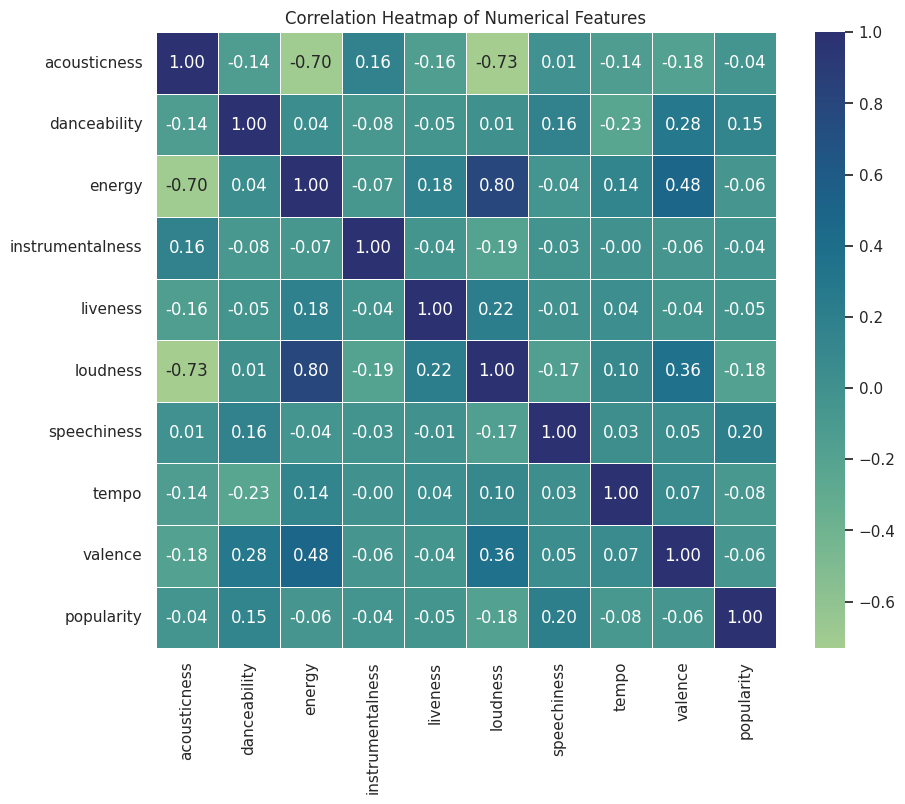

In [34]:
correlation_matrix = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

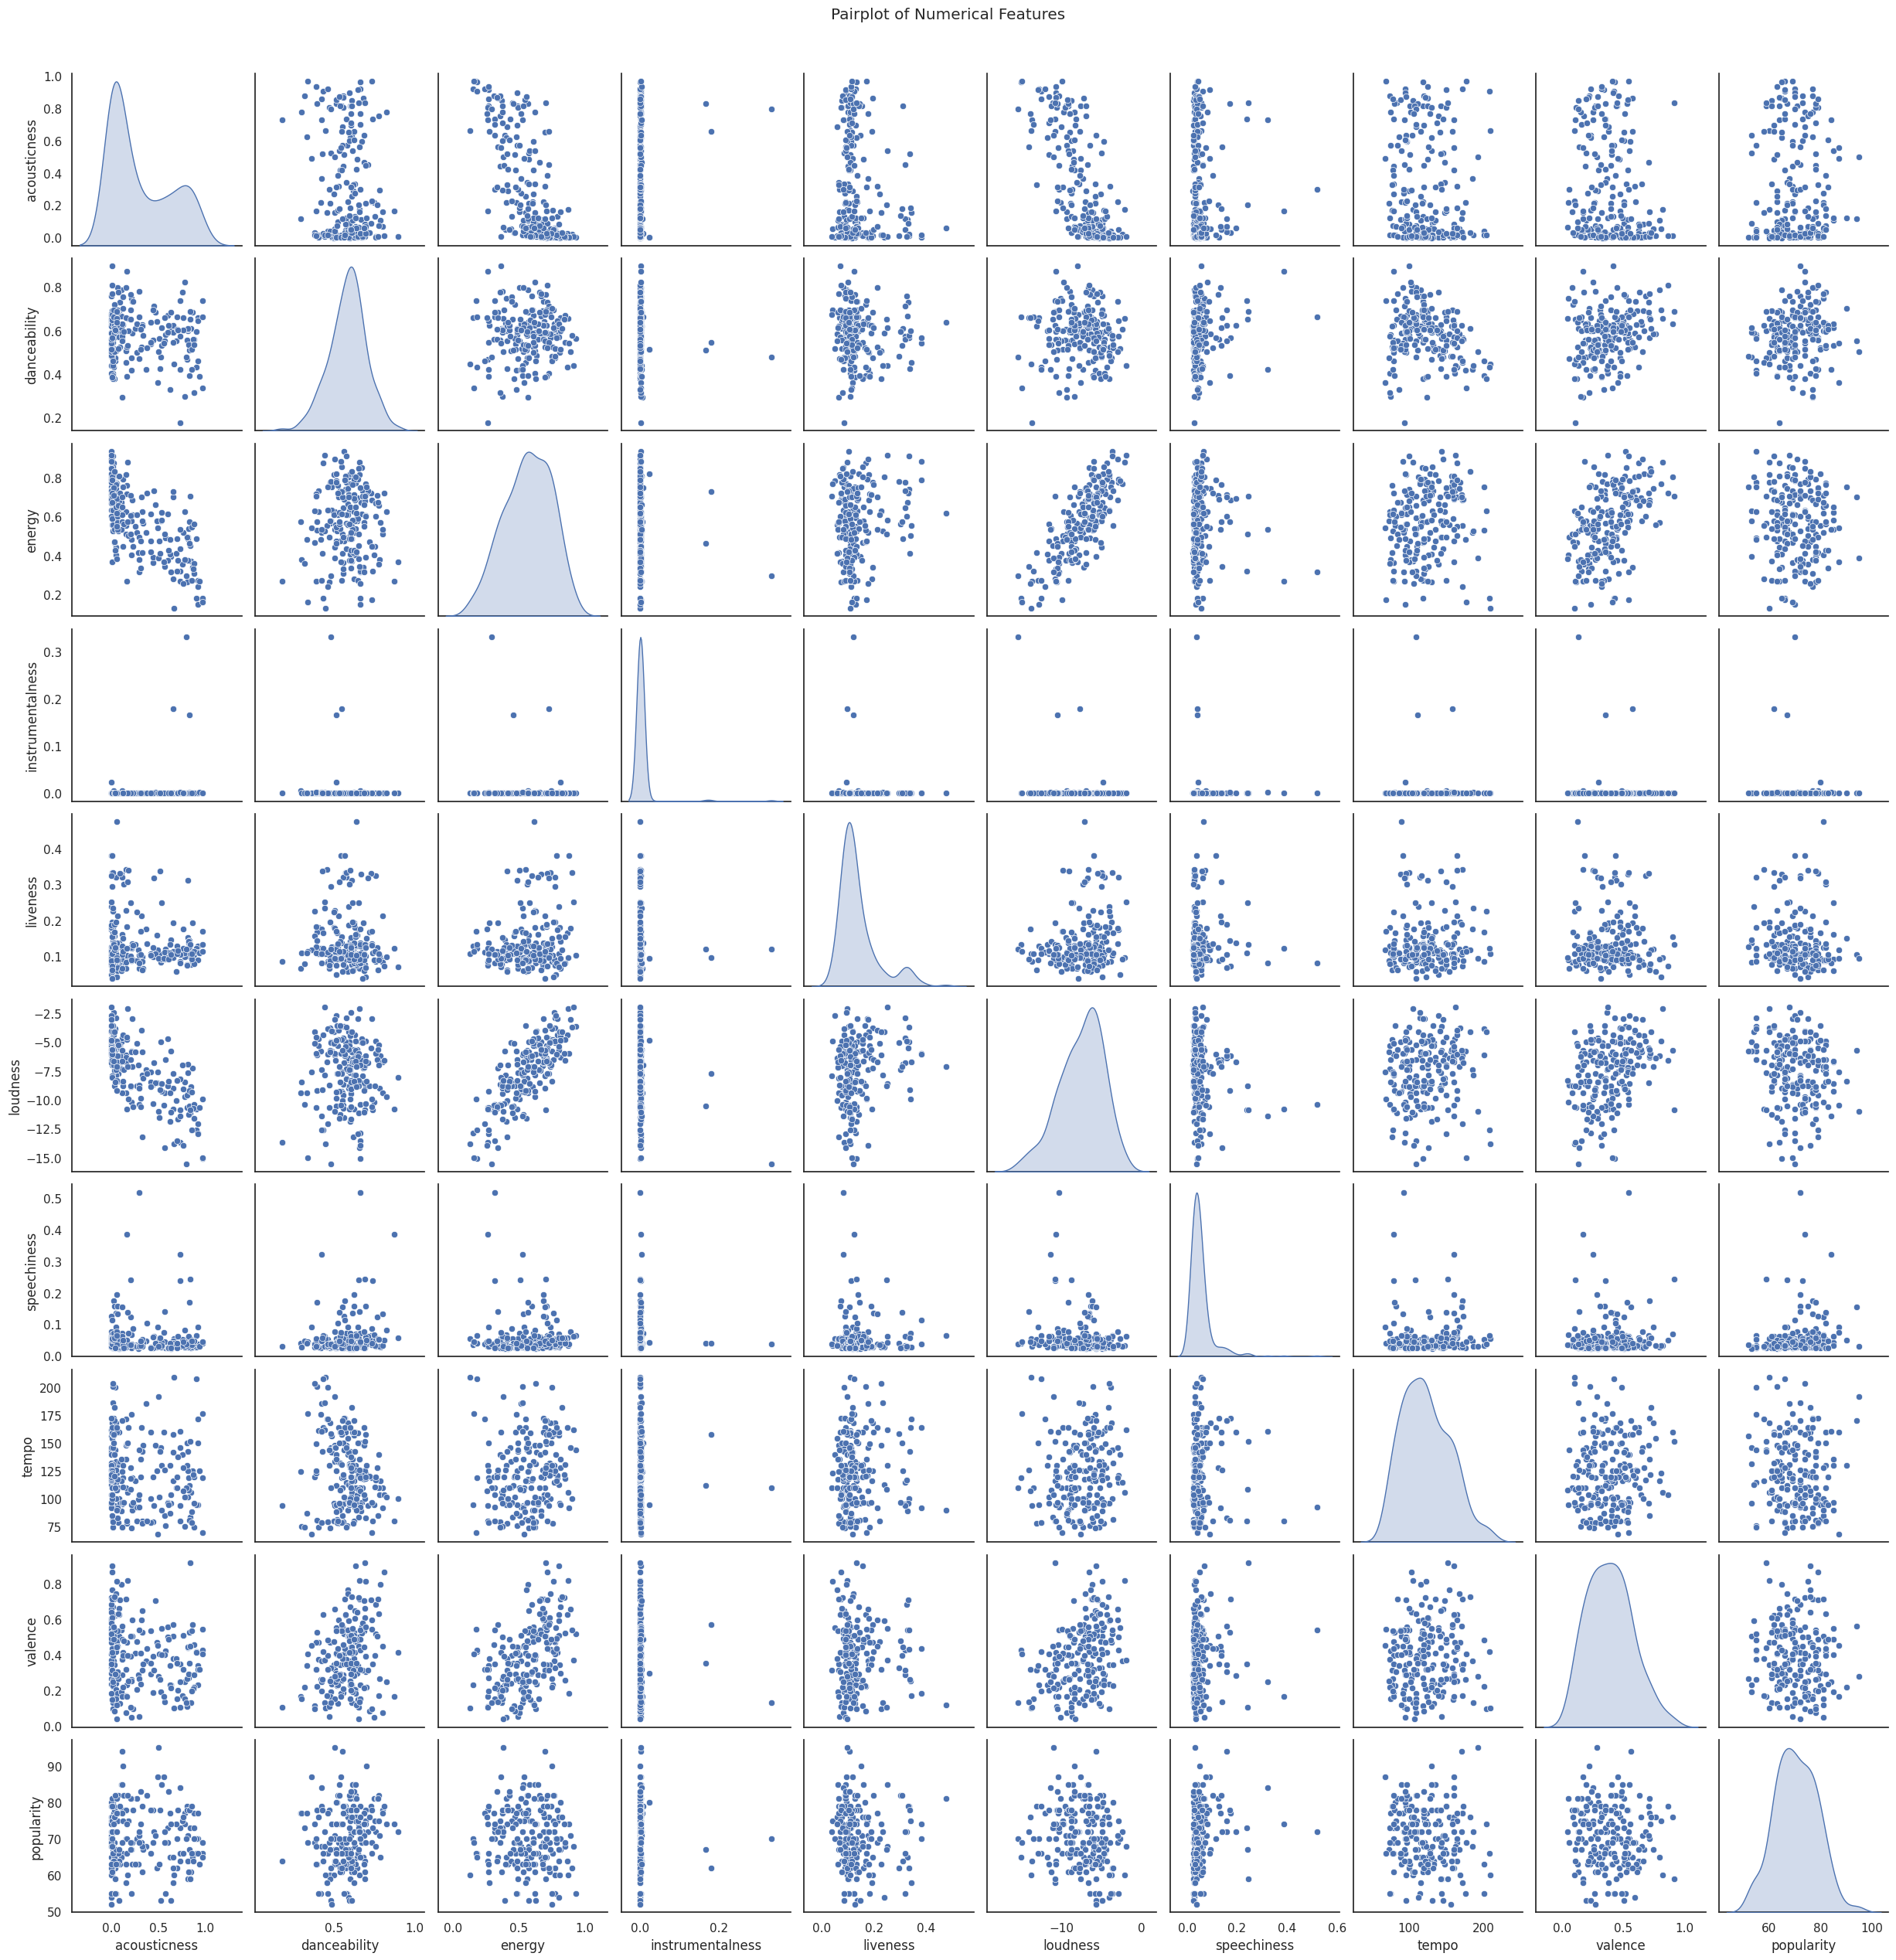

In [35]:
sns.pairplot(df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

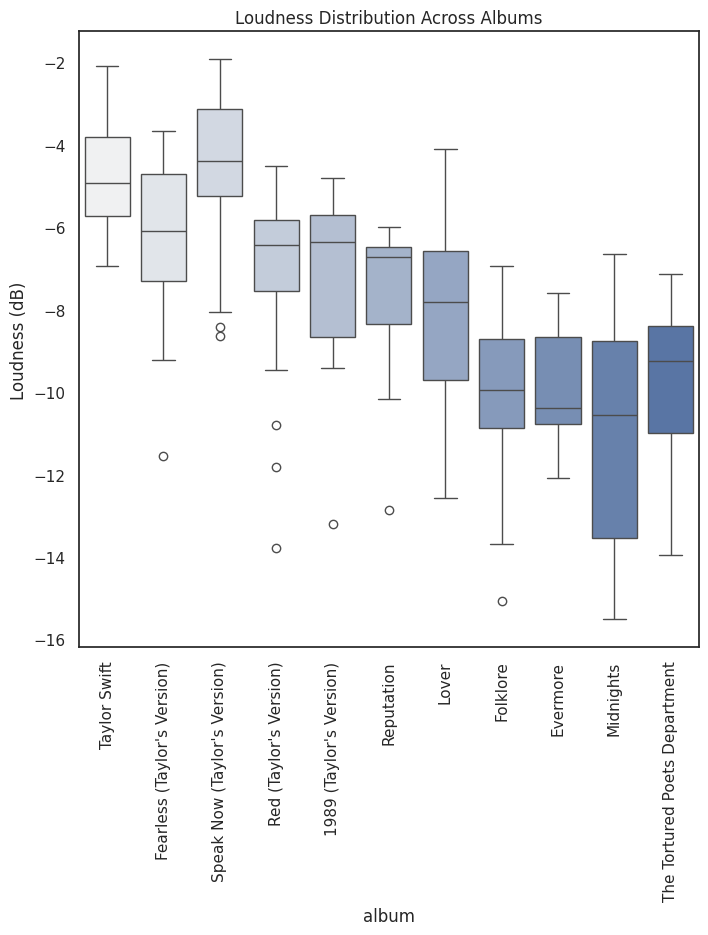

In [44]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=df, x='album', y='loudness', palette='light:b', hue='album')
plt.title('Loudness Distribution Across Albums')
plt.ylabel('Loudness (dB)')
plt.xticks(rotation=90)
plt.show()

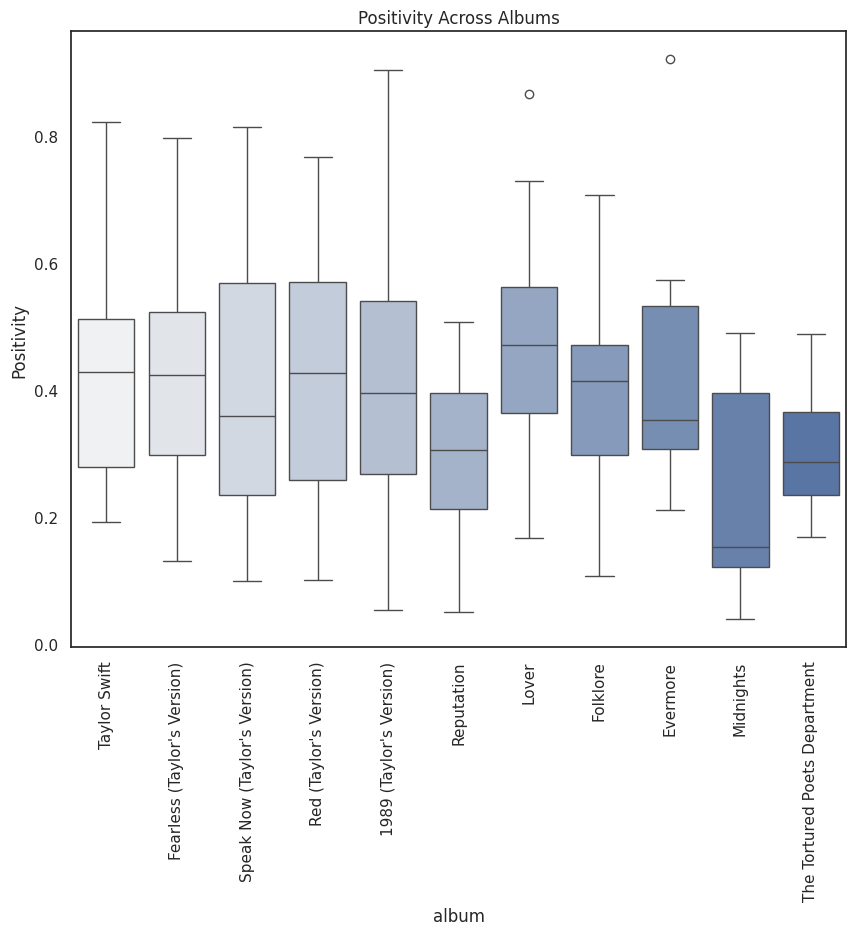

In [43]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='album', y='valence', palette='light:b', hue='album')
plt.title('Positivity Across Albums')
plt.ylabel('Positivity')
plt.xticks(rotation=90)
plt.show()

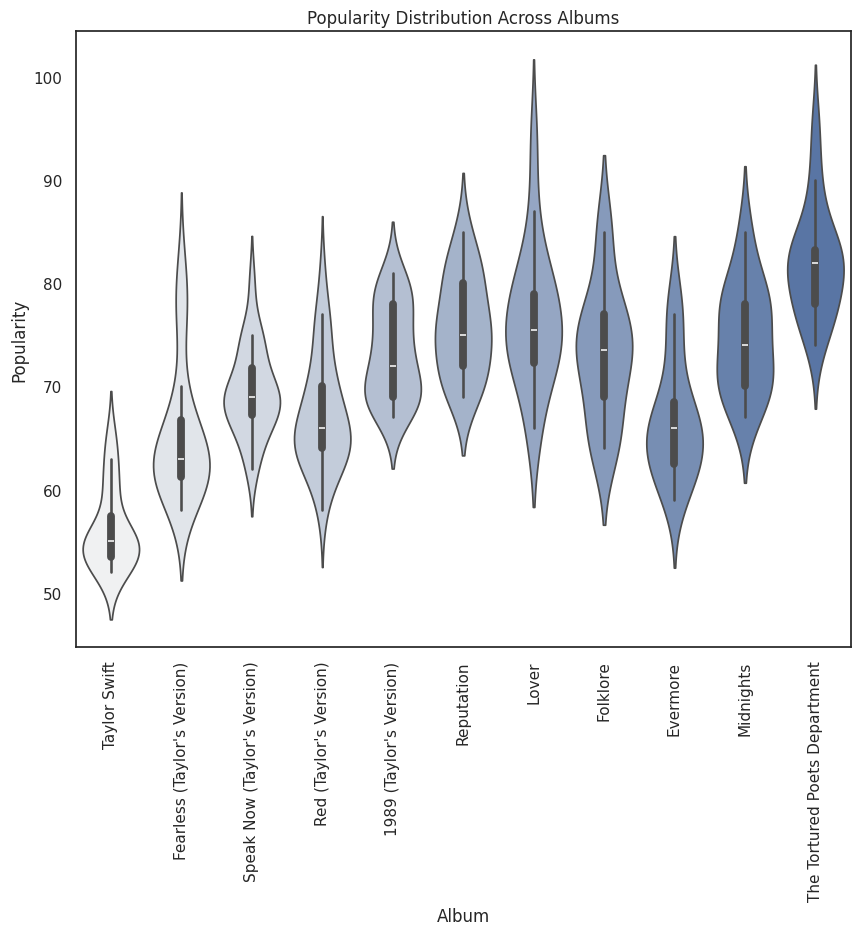

In [49]:
# Violin plot to show distribution of danceability across different albums
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='album', y='popularity', palette='light:b', density_norm='width', hue='album')
plt.title('Popularity Distribution Across Albums')
plt.xlabel('Album')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_9898/290023520.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='valence', y='name', data=top_songs, palette='light:b')


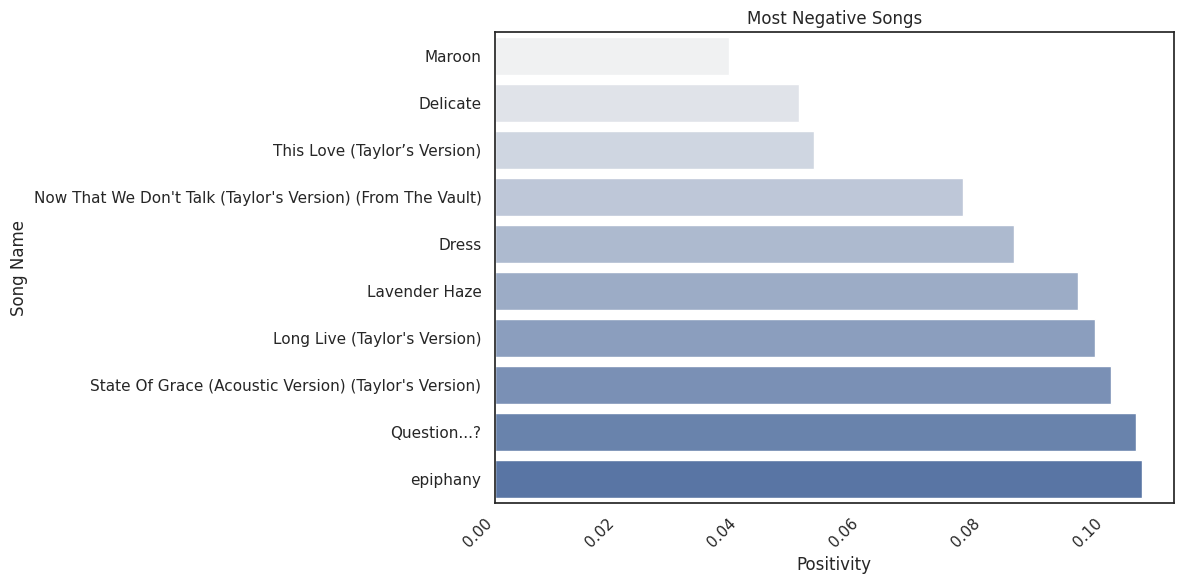

In [58]:
# Top Songs
top_songs = df.sort_values(by='valence', ascending=True).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='valence', y='name', data=top_songs, palette='light:b')  
plt.title('Most Negative Songs')
plt.xlabel('Positivity')
plt.ylabel('Song Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()